In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.metrics import confusion_matrix, accuracy_score

In [3]:
df = pd.read_csv('Cardetails.csv')  # Update path if needed
df.head()

name  year  selling_price  km_driven    fuel  \
0        Maruti Swift Dzire VDI  2014         450000     145500  Diesel   
1  Skoda Rapid 1.5 TDI Ambition  2014         370000     120000  Diesel   
2      Honda City 2017-2020 EXi  2006         158000     140000  Petrol   
3     Hyundai i20 Sportz Diesel  2010         225000     127000  Diesel   
4        Maruti Swift VXI BSIII  2007         130000     120000  Petrol   

  seller_type transmission         owner     mileage   engine   max_power  \
0  Individual       Manual   First Owner   23.4 kmpl  1248 CC      74 bhp   
1  Individual       Manual  Second Owner  21.14 kmpl  1498 CC  103.52 bhp   
2  Individual       Manual   Third Owner   17.7 kmpl  1497 CC      78 bhp   
3  Individual       Manual   First Owner   23.0 kmpl  1396 CC      90 bhp   
4  Individual       Manual   First Owner   16.1 kmpl  1298 CC    88.2 bhp   

                     torque  seats  
0            190Nm@ 2000rpm    5.0  
1       250Nm@ 1500-2500rpm    5.0  
2     12.7@ 2,700(kgm@ rpm)    5.0  
3  22.4 kgm at 1750-2750rpm    5.0  
4     11.5@ 4,500(kgm@ rpm)    5.0

In [5]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          221
engine           221
max_power        215
torque           222
seats            221
dtype: int64

In [7]:
le = LabelEncoder()
for col in df.select_dtypes(include='object').columns:
    df[col] = le.fit_transform(df[col])
df.head()

name  year  selling_price  km_driven  fuel  seller_type  transmission  \
0  1307  2014         450000     145500     1            1             1   
1  1607  2014         370000     120000     1            1             1   
2   385  2006         158000     140000     3            1             1   
3   781  2010         225000     127000     1            1             1   
4  1349  2007         130000     120000     3            1             1   

   owner  mileage  engine  max_power  torque  seats  
0      0      335      13        244     178    5.0  
1      2      284      36         15     260    5.0  
2      4      180      35        253      66    5.0  
3      0      327      24        297     224    5.0  
4      0      136      14        288      21    5.0

In [11]:
print(df.columns)


Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage', 'engine', 'max_power', 'torque',
       'seats'],
      dtype='object')


In [13]:
# Optional: Clean column names
df.columns = df.columns.str.strip()       # Remove whitespace
df.columns = df.columns.str.lower()       # Lowercase for consistency
print(df.columns)

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage', 'engine', 'max_power', 'torque',
       'seats'],
      dtype='object')


In [17]:
df.rename(columns={'selling_price': 'price'}, inplace=True)  # Example

In [23]:
plt.figure(figsize=(8, 5))
sns.histplot(df['price'], bins=30, kde=True)
plt.title("Distribution of Car prices")
plt.xlabel("price")
plt.ylabel("Frequency")
plt.show()


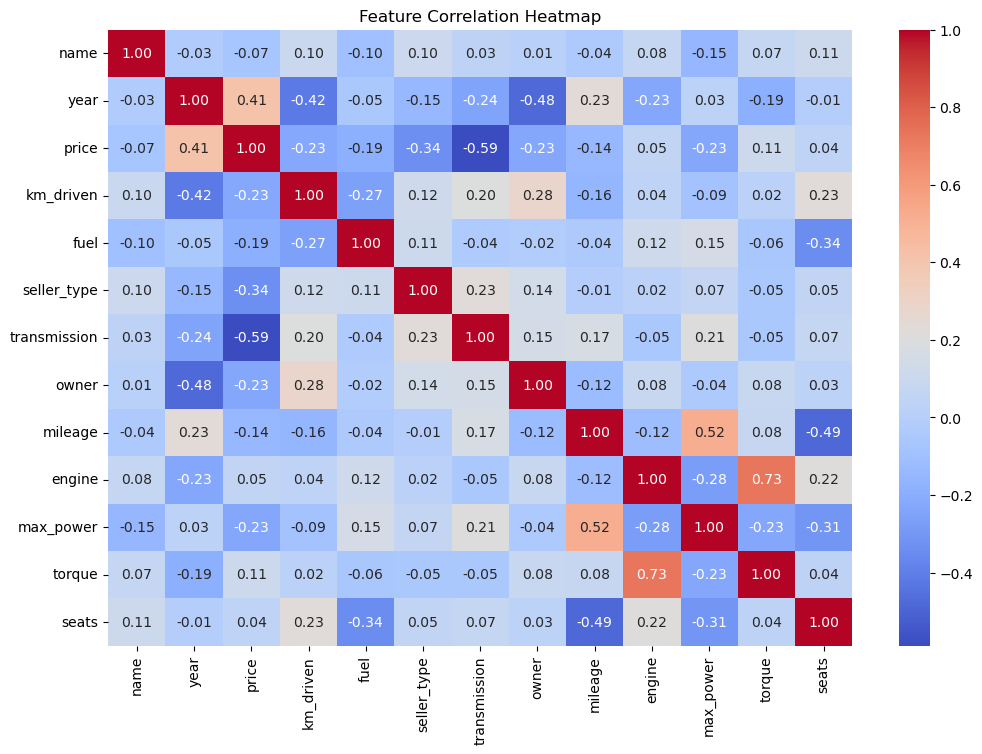

In [25]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

In [29]:
X = df.drop('price', axis=1)
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [33]:
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np
import joblib

# Step 1: Handle missing values using mean imputation
imputer = SimpleImputer(strategy='mean')
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

# Step 2: Train Linear Regression model
lr = LinearRegression()
lr.fit(X_train, y_train)

# Step 3: Predict
y_pred_lr = lr.predict(X_test)

# Step 4: Evaluate
print("Linear Regression")
print("R2 Score:", r2_score(y_test, y_pred_lr))
print("MAE:", mean_absolute_error(y_test, y_pred_lr))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_lr)))

# Step 5: Save the model
joblib.dump(lr, 'linear_regression_model.pkl')

Linear Regression
R2 Score: 0.5276226769526873
MAE: 323922.149148609
RMSE: 556449.4453744418


['linear_regression_model.pkl']

In [35]:
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

print("Decision Tree")
print("R2 Score:", r2_score(y_test, y_pred_dt))
print("MAE:", mean_absolute_error(y_test, y_pred_dt))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_dt)))

joblib.dump(dt, 'decision_tree_model.pkl')

Decision Tree
R2 Score: 0.9425167408791846
MAE: 78649.6440533636
RMSE: 194111.7769158903


['decision_tree_model.pkl']

In [37]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("Random Forest")
print("R2 Score:", r2_score(y_test, y_pred_rf))
print("MAE:", mean_absolute_error(y_test, y_pred_rf))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_rf)))

joblib.dump(rf, 'random_forest_model.pkl')

Random Forest
R2 Score: 0.9721568331233708
MAE: 65778.59552640464
RMSE: 135095.38355999134


['random_forest_model.pkl']

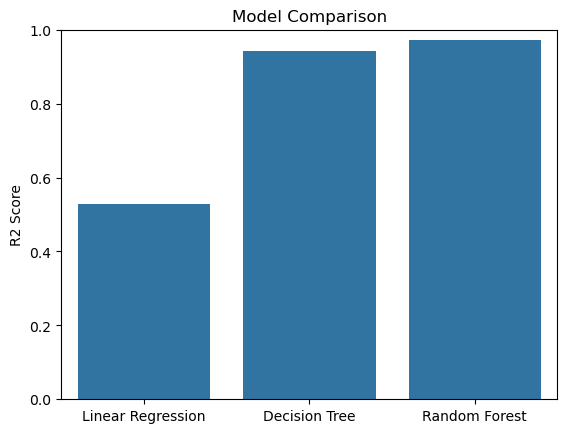

In [39]:
models = ['Linear Regression', 'Decision Tree', 'Random Forest']
scores = [
    r2_score(y_test, y_pred_lr),
    r2_score(y_test, y_pred_dt),
    r2_score(y_test, y_pred_rf)
]

sns.barplot(x=models, y=scores)
plt.ylabel("R2 Score")
plt.title("Model Comparison")
plt.ylim(0, 1)
plt.show()

In [41]:
predictions_df = pd.DataFrame({
    'Actual': y_test,
    'Linear Regression': y_pred_lr,
    'Decision Tree': y_pred_dt,
    'Random Forest': y_pred_rf
})

predictions_df.to_csv('model_predictions.csv', index=False)
predictions_df.head()


Actual  Linear Regression  Decision Tree  Random Forest
1971  198000     -184942.595844       198000.0      145140.00
4664  500000      659722.223946       700000.0      576294.97
5448  425000      573811.146427       409999.0      439369.74
3333  150000     -237209.898634        90177.0      161629.94
2316  525000      352490.182901       380000.0      375290.00

In [51]:
# Create price categories: 0=Low, 1=Medium, 2=High
def categorize(price):
    if price < df['price'].quantile(0.33):
        return 0
    elif price < df['price'].quantile(0.66):
        return 1
    else:
        return 2

In [53]:
y_class_test = y_test.apply(categorize)
y_class_pred = pd.Series(y_pred_rf).apply(categorize)

# Evaluate classification accuracy
cm = confusion_matrix(y_class_test, y_class_pred)
acc = accuracy_score(y_class_test, y_class_pred)

print("Confusion Matrix:\n", cm)
print("Accuracy Score:", acc)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

Confusion Matrix:
 [[473  51   1]
 [ 52 467  48]
 [  1  70 463]]
Accuracy Score: 0.8628536285362853
